In [11]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import median_absolute_error
from src.data.data_fetcher import get_raw_data
from src.features.feature_engineering import prepare_data
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error

from src.features.preprocess_data import fetch_preprocessed_data, get_preprocessed_test_data

## Step 1: Load data and preprocess it

In [12]:
train_a, train_b, train_c, X_train_estimated_a, X_train_estimated_b, X_train_estimated_c, X_train_observed_a, X_train_observed_b, X_train_observed_c, X_test_estimated_a, X_test_estimated_b, X_test_estimated_c = get_raw_data()

In [13]:
X_train_obs_combined, X_val_obs_combined, y_train_obs_combined, y_val_obs_combined, X_train_est_combined, X_val_est_combined, y_train_est_combined, y_val_est_combined = fetch_preprocessed_data()
X_test_estimated_a_processed, X_test_estimated_b_processed, X_test_estimated_c_processed = get_preprocessed_test_data()

c:\Users\Bruker\OneDrive\NTNU semester 05\TDT4173 Maskinlæring\ml_power_predictor\src\features\feature_engineering.py:131: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  estimated_resampled = estimated.resample('1H').mean()
c:\Users\Bruker\OneDrive\NTNU semester 05\TDT4173 Maskinlæring\ml_power_predictor\src\features\feature_engineering.py:131: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  estimated_resampled = estimated.resample('1H').mean()
c:\Users\Bruker\OneDrive\NTNU semester 05\TDT4173 Maskinlæring\ml_power_predictor\src\features\feature_engineering.py:131: FutureWarning: The default value of numeric_o

In [14]:
# Initialize a Gradient Boosting regressor
gb_model = GradientBoostingRegressor(n_estimators=100, random_state=42)

# Train the Gradient Boosting model on the cleaned training data
gb_model.fit(X_train_obs_combined, y_train_obs_combined)

GradientBoostingRegressor(random_state=42)

In [15]:
# Predict the target variable on the validation observed data
y_pred_val_obs_combined = gb_model.predict(X_val_obs_combined)
y_pred_val_est_combined = gb_model.predict(X_val_est_combined)

# Evaluate the model's performance using Mean Absolute Error (MAE) on the combined validation observed data
mae_obs_combined = mean_absolute_error(y_val_obs_combined, y_pred_val_obs_combined)
mae_est_combined = mean_absolute_error(y_val_est_combined, y_pred_val_est_combined)
print('MAE on validation observed data: ', mae_obs_combined)
print('MAE on validation estimated data: ', mae_est_combined)


MAE on validation observed data:  12.62212508065999
MAE on validation estimated data:  21.294469152836484


In [16]:
# Predict on the cleaned validation set
y_val_pred_est_a = gb_model.predict(X_test_estimated_a_processed)
y_val_pred_est_b = gb_model.predict(X_test_estimated_b_processed)
y_val_pred_est_c = gb_model.predict(X_test_estimated_c_processed)

# Combine the predictions into a single array
y_pred_test_est_combined = y_val_pred_est_a + y_val_pred_est_b + y_val_pred_est_c
y_pred_test_est_combined.shape


(2880,)

## Step 4: Visualize the results

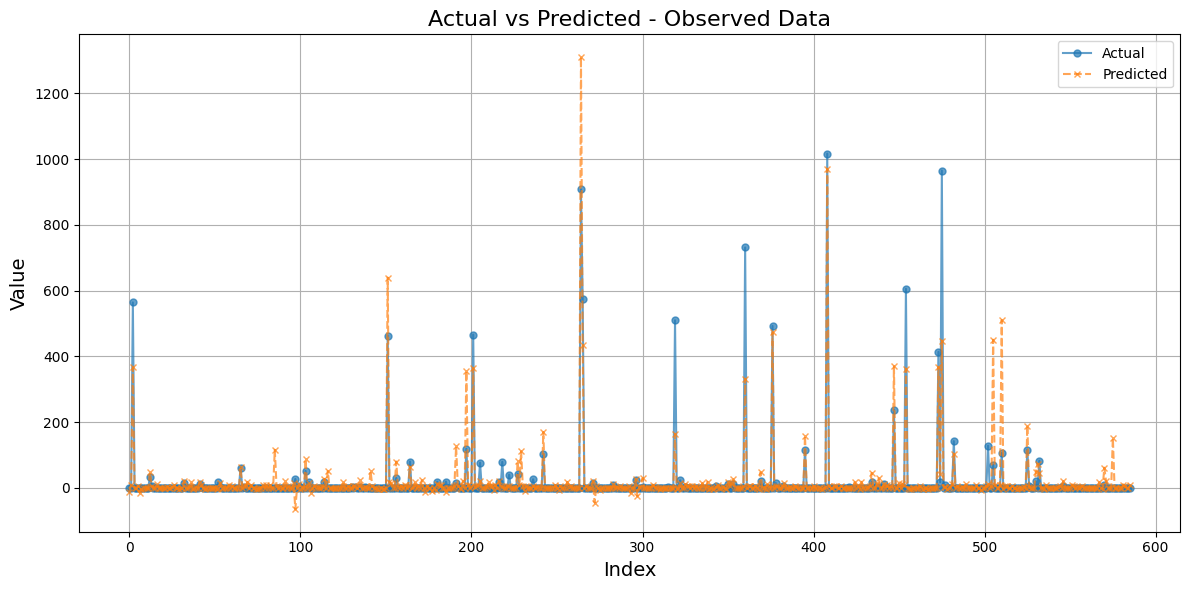

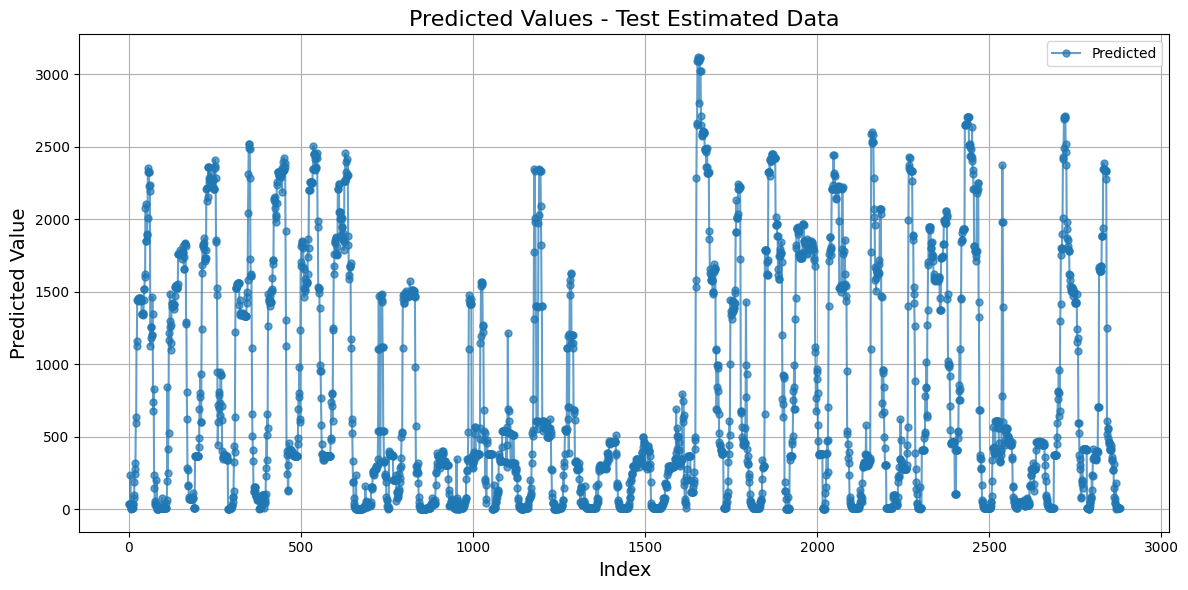

In [17]:

# Set up the plotting area
plt.figure(figsize=(12, 6))

# Line plot of Actual values
plt.plot(y_val_obs_combined.reset_index(drop=True), label='Actual', linestyle='-', marker='o', markersize=5, alpha=0.7)

# Line plot of Predicted values
plt.plot(pd.Series(y_pred_val_obs_combined, index=y_val_obs_combined.index).reset_index(drop=True), label='Predicted', linestyle='--', marker='x', markersize=5, alpha=0.7)

# Titles and labels
plt.title('Actual vs Predicted - Observed Data', fontsize=16)
plt.xlabel('Index', fontsize=14)
plt.ylabel('Value', fontsize=14)
plt.legend()
plt.grid(True)
plt.tight_layout()

# Show the plots
plt.show()

plt.figure(figsize=(12, 6))
plt.plot(pd.Series(y_pred_test_est_combined, index=X_test_estimated_a_processed.index).reset_index(drop=True), label='Predicted', linestyle='-', marker='o', markersize=5, alpha=0.7)
plt.title('Predicted Values - Test Estimated Data', fontsize=16)
plt.xlabel('Index', fontsize=14)
plt.ylabel('Predicted Value', fontsize=14)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


## Step 5: Save the model

In [19]:
RES_PATH = 'results/output/'

model = pd.Series(y_pred_test_est_combined, name='prediction')
model = model.reset_index(drop=True).to_frame(name='prediction')
model.insert(0, 'id', range(len(model)))
model['prediction'] = model['prediction'].apply(lambda x: max(0, x))

model.to_csv(f'{RES_PATH}gradient_boost_with_no_feature_engineering.csv', index=False)
model.head()

,id,prediction
0,0,36.271565
1,1,35.409100
2,2,35.409100
3,3,35.409100
4,4,232.581130
